In [10]:
import os
import sys
import glob
from utilsfn import * 


In [11]:
mtx, dist = loadDistMatrix()

In [12]:
out_dir='output_images/s1/'
images = glob.glob('test_images/*.jpg')

#Undistort and save the images
for idx, fname in enumerate(images):
    dst = undistort(cv2.imread(fname), mtx, dist)
    image_name=os.path.split(fname)[1]
    write_name = out_dir+'undistorted_'+image_name
    print("Saving: [" + write_name + "]")
    cv2.imwrite(write_name,dst)

Saving: [output_images/s1/undistorted_straight_lines1.jpg]
Saving: [output_images/s1/undistorted_straight_lines2.jpg]
Saving: [output_images/s1/undistorted_test1.jpg]
Saving: [output_images/s1/undistorted_test2.jpg]
Saving: [output_images/s1/undistorted_test3.jpg]
Saving: [output_images/s1/undistorted_test4.jpg]
Saving: [output_images/s1/undistorted_test5.jpg]
Saving: [output_images/s1/undistorted_test6.jpg]


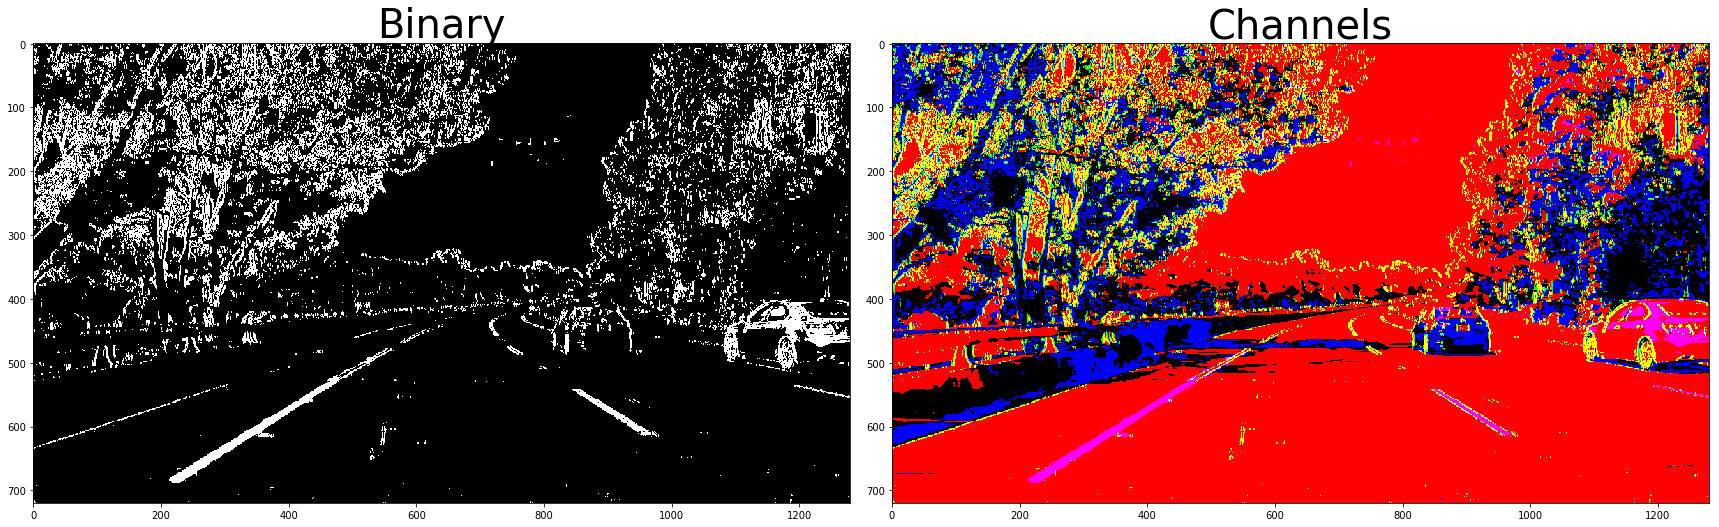

In [13]:
img = plt.imread('test_images/test5.jpg')

shape = img.shape
binary,channels = binarize(img)
plt.imsave(out_dir+'binary.jpg',binary)
plt.imsave(out_dir+'channels.jpg',channels)

# Plot the result
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(binary)
ax1.set_title('Binary', fontsize=40)

ax2.imshow(channels)
ax2.set_title('Channels', fontsize=40)

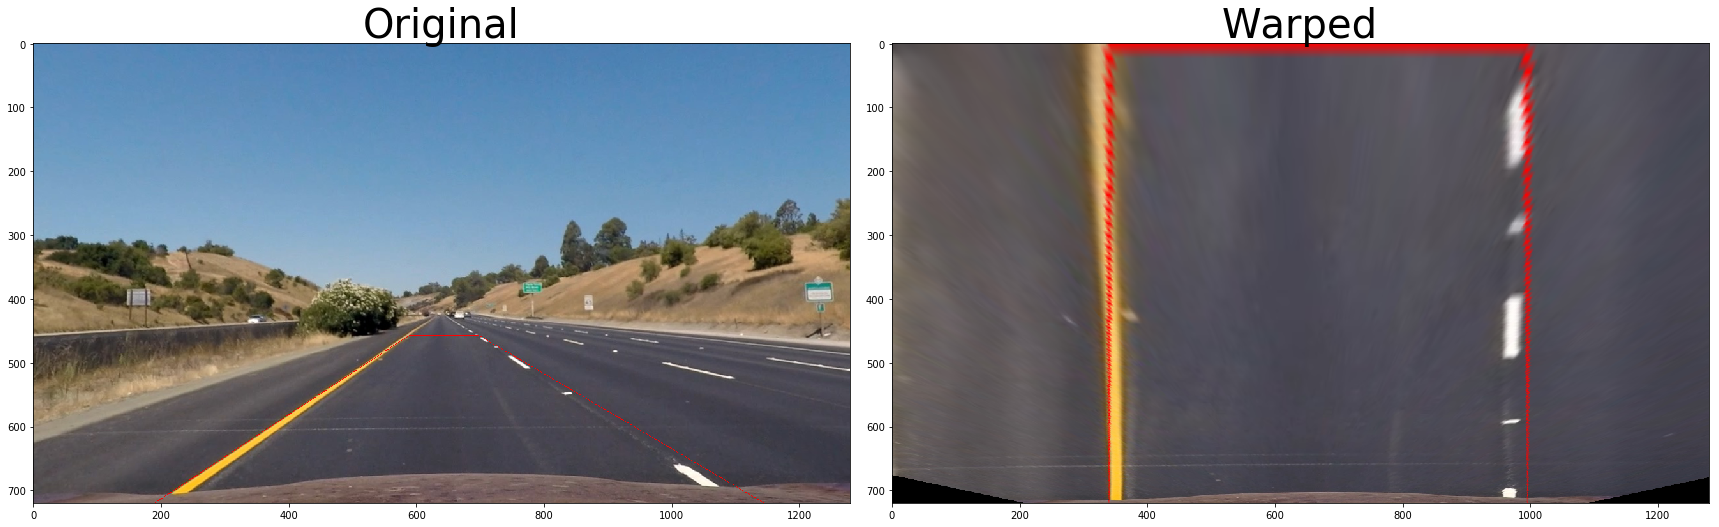

In [14]:
img=plt.imread('test_images/straight_lines1.jpg')
corners = np.float32([[190,720],[589,457],[698,457],[1145,720]])
img = cv2.undistort(img, mtx, dist, None, mtx)
imshape = img.shape

corner_tuples=[]
for ind,c in enumerate(corners):
    corner_tuples.append(tuple(corners[ind]))

cv2.line(img, corner_tuples[0], corner_tuples[1], color=[255,0,0], thickness=1)
cv2.line(img, corner_tuples[1], corner_tuples[2], color=[255,0,0], thickness=1)
cv2.line(img, corner_tuples[2], corner_tuples[3], color=[255,0,0], thickness=1)
cv2.line(img, corner_tuples[3], corner_tuples[0], color=[255,0,0], thickness=1)

warped,_ = warp(img) 
plt.imsave(out_dir+'straight_red.jpg',img)
plt.imsave(out_dir+'straight_red_warped.jpg',warped)

# Plot the result
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img)
ax1.set_title('Original', fontsize=40)

ax2.imshow(warped)
ax2.set_title('Warped', fontsize=40)

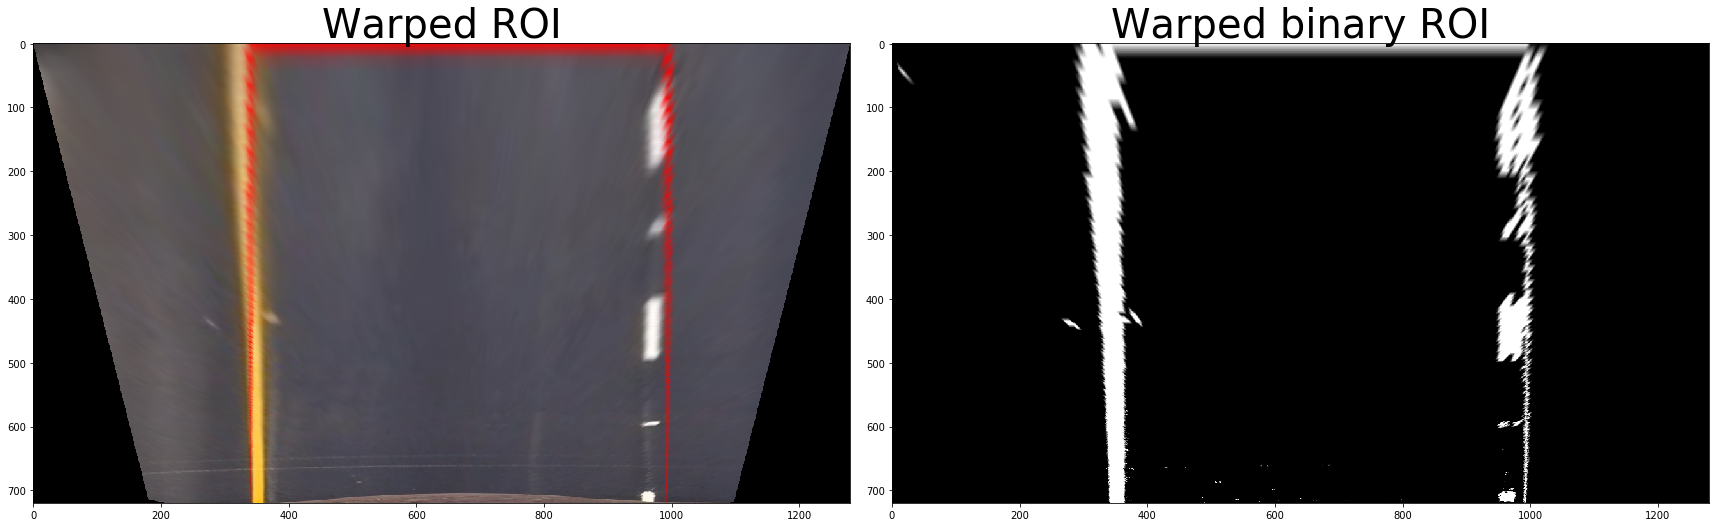

In [15]:
warped = warp_pipeline(img, mtx, dist)
warped_binary = warp_binarize_pipeline(img, mtx, dist)

plt.imsave(out_dir+'warp_roi.jpg',warped)
plt.imsave(out_dir+'warp_binary_roi.jpg',warped_binary)

# Plot the result
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(warped)
ax1.set_title('Warped ROI', fontsize=40)

ax2.imshow(warped_binary)
ax2.set_title('Warped binary ROI', fontsize=40)

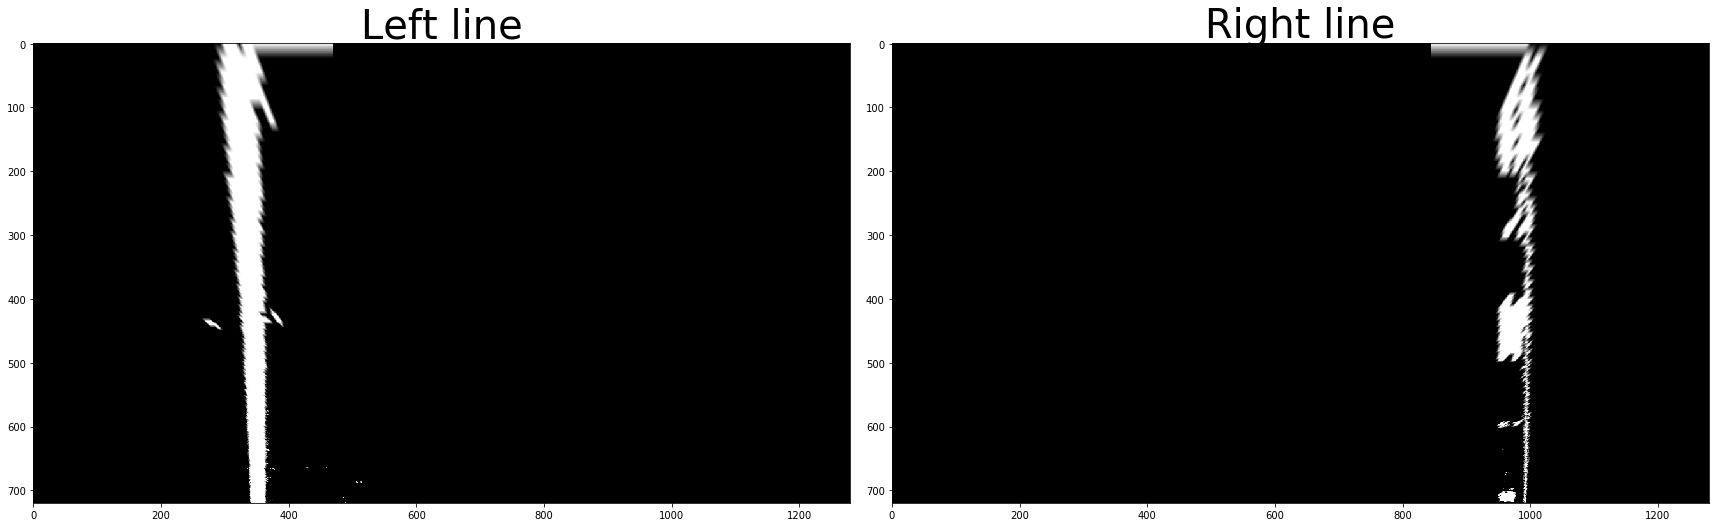

In [16]:
left_binary = lane_from_window(warped_binary,380,300)
right_binary = lane_from_window(warped_binary,1000,300)

plt.imsave(out_dir+'left_line.jpg',left_binary)
plt.imsave(out_dir+'right_line.jpg',right_binary)

# Plot the result
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(left_binary)
ax1.set_title('Left line', fontsize=40)

ax2.imshow(right_binary)
ax2.set_title('Right line', fontsize=40)

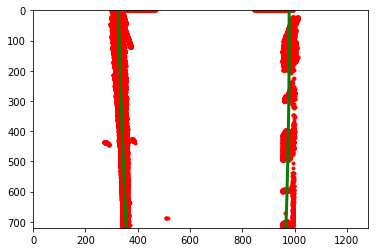

In [17]:
left=Line()
right=Line()

detected_l,n_buffered_left = left.update(left_binary)
detected_r,n_buffered_right = right.update(right_binary)

leftx = left.allx
left_fitx = left.current_fit_xvals
yvals_l = left.ally

rightx = right.allx
right_fitx = right.current_fit_xvals
yvals_r = right.ally

yvals = left.fit_yvals

plt.plot(rightx, yvals_r, '.', color='red')
plt.plot(right_fitx, yvals, color='green', linewidth=3)

plt.plot(leftx, yvals_l, '.', color='red')
plt.plot(left_fitx, yvals, color='green', linewidth=3)

plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.gca().invert_yaxis()
plt.savefig(out_dir+'fitted_lines.jpg')
plt.show()

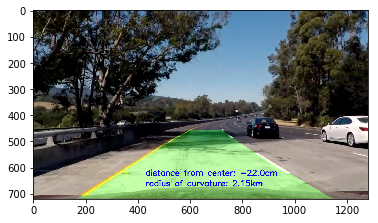

In [18]:
img = plt.imread('test_images/test5.jpg')
left = Line(7)
right = Line(7)

result = process_image(img, mtx, dist, left, right)
result = process_image(img, mtx, dist, left, right)

plt.figure()
plt.imshow(result)
plt.show()
plt.imsave(out_dir+'project_test5.jpg',result)